# **Approximated Cloning**

Crea una copia approssimata di $q_1$ su $q_0$.

In [25]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import numpy as np
from BoredQiskit import FastQiskit as fq

In [ ]:

qx = QuantumRegister(1, 'x')
q0 = QuantumRegister(1, '|0>')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qx, q0, 2)
qc.h(1)
qc.cx(1,0)
qc.ry(-np.pi/3, range(0,2))
qc.measure(range(2), range(2))
qc.draw('mpl')

CircuitError: "Circuit args must be Registers or integers. (['list', 'int'] '([QuantumRegister(1, 'x'), QuantumRegister(1, '|0>')], 2)' was provided)"

## **Esperimento 1: swap test tra le copie approssimate**

In [163]:
def swap_test():
    qx = QuantumRegister(1,name="x")
    qy = QuantumRegister(1,name="y")
    a = QuantumRegister(1,name="a")
    qc = QuantumCircuit(qx,qy,a)
    qc.h(a)
    qc.cswap(a,qx,qy)
    qc.h(a)
    return qc.to_gate(label='swap_test')


Utilizziamo lo swap test per verificare se le due copie approssimate sono uguali tra loro.

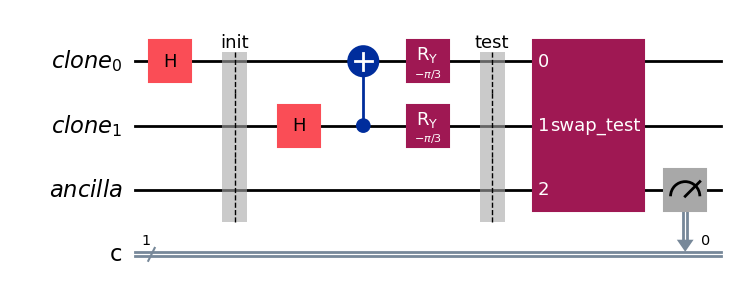

In [166]:
qx = QuantumRegister(2, 'clone')
a = QuantumRegister(1, 'ancilla')
c = ClassicalRegister(1,'c')
qc = QuantumCircuit(qx, a, c)

qc.h(qx[0])
qc.barrier(label = 'init')
qc.h(qx[1])
qc.cx(qx[1],qx[0])
qc.ry(-np.pi/3, qx)

qc.barrier(label = 'test')
qc.compose(swap_test(), [*qx, a], inplace=True)
qc.measure(a,c)

qc.draw('mpl')

In [157]:
fq.run(qc)

{'0': 1024}

## **Esperimento 2: swap test copia approssimata-originale**

Utilizziamo lo swap test per verificare la somiglianza tra input e una delle due copie.

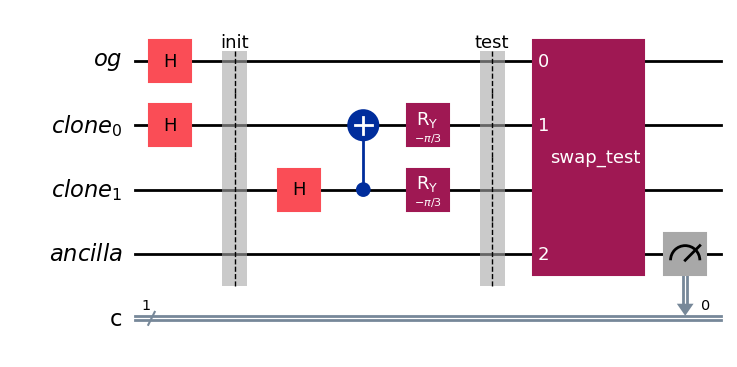

In [168]:
qo = QuantumRegister(1, 'og')
qx = QuantumRegister(2, 'clone')
a = QuantumRegister(1, 'ancilla')
c = ClassicalRegister(1,'c')
qc = QuantumCircuit(qo, qx, a, c)

qc.h(qo)
qc.h(qx[0])

qc.barrier(label = 'init')
qc.h(qx[1])
qc.cx(qx[1],qx[0])
qc.ry(-np.pi/3, qx)

qc.barrier(label = 'test')
qc.compose(swap_test(), [qo, qx[0], a], inplace=True)
qc.measure(a,c)

qc.draw('mpl')

In [191]:
fq.run(qc, 10000)

{'1': 1302, '0': 8698}